In [1]:
import warnings
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud  # Word visualization
import matplotlib.pyplot as plt  # Plotting properties
import seaborn as sns  # Plotting properties
from sklearn.feature_extraction.text import CountVectorizer  # Data transformation
from sklearn.model_selection import train_test_split  # Data testing
from sklearn.linear_model import LogisticRegression  # Prediction Model

# Comparison between real and predicted
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import (
    LabelEncoder,
)  # Variable encoding and decoding for XGBoost
import re  # Regular expressions
import nltk
from nltk import word_tokenize
from pathlib import Path

nltk.download("stopwords")
nltk.download("punkt")
# Construct the path to the CSV file
csv_path_train = "/Users/kamil/Documents/ml/sentimaniac/datasets/twitter_data.csv"
csv_path_test = "/Users/kamil/Documents/ml/sentimaniac/datasets/reddit_data.csv"

# Read the CSV file
train = pd.read_csv(csv_path_train, encoding='utf-8')
test = pd.read_csv(csv_path_test, encoding='utf-8')

[nltk_data] Downloading package stopwords to /Users/kamil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kamil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
train.columns = ['text','Sentiment']
test.columns = ['text','Sentiment']

In [3]:
train = train[['text','Sentiment']]
test = test[['text','Sentiment']]

In [4]:
train.Sentiment.value_counts()

Sentiment
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

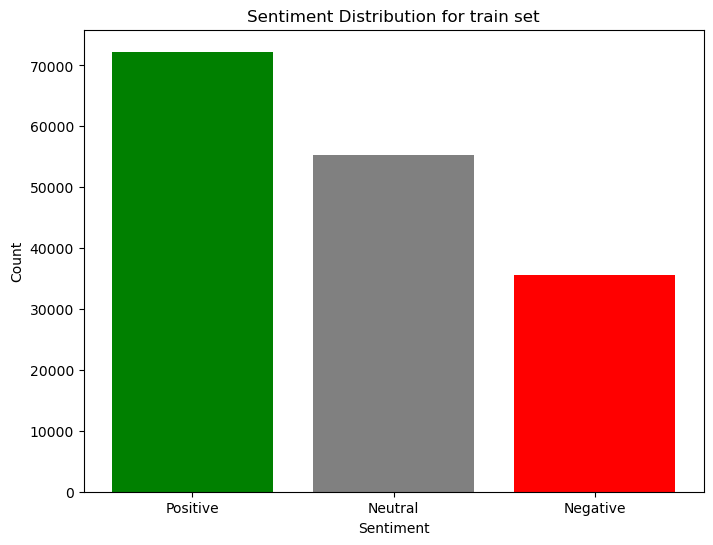

In [5]:
sentiment_counts = train['Sentiment'].value_counts()

labels = ['Positive', 'Neutral', 'Negative']
colors = ['green', 'gray', 'red']

plt.figure(figsize=(8, 6))
plt.bar(labels, sentiment_counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for train set')
plt.show()

In [6]:
test.Sentiment.value_counts()

Sentiment
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64

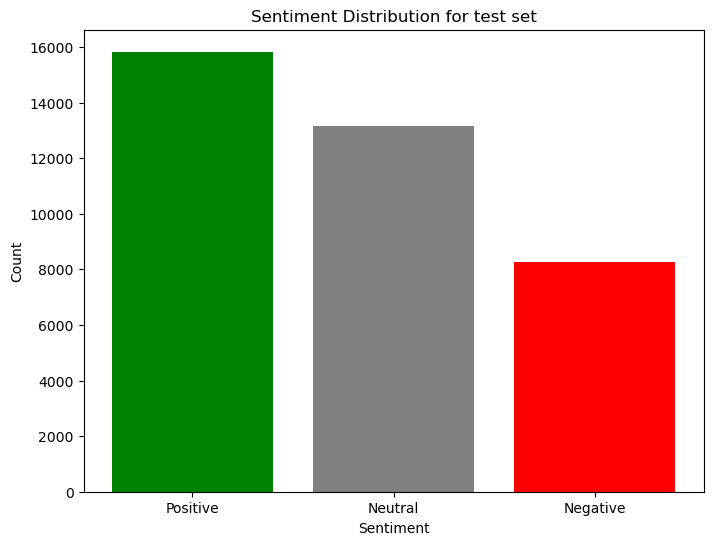

In [7]:
sentiment_counts = test['Sentiment'].value_counts()

labels = ['Positive', 'Neutral', 'Negative']
colors = ['green', 'gray', 'red']

plt.figure(figsize=(8, 6))
plt.bar(labels, sentiment_counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for test set')
plt.show()

-1 - negative,
0 - neutral,
1 - positive



Data cleaning: Rows containing missing values in training and test data are deleted.

In [8]:
train.isna().sum().sum()

11

In [9]:
train = train.dropna()

In [10]:
train.isna().sum().sum()

0

In [11]:
test.isna().sum().sum()

100

In [12]:
test = test.dropna()

In [13]:
test.isna().sum().sum()

0

Assign and see the train and test data

In [14]:
train_data=train
train_data

,text,Sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [15]:
test_data=test
test_data

,text,Sentiment
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


Preparation of text data: Text is converted into a form suitable for analysis by reducing letters, removing special characters using regular expressions.

In [16]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
test_data["lower"]=test_data.text.str.lower() #lowercase
test_data["lower"]=[str(data) for data in test_data.lower] #converting all to string
test_data["lower"]=test_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [17]:
train_data.head()

,text,Sentiment,lower
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


Word cloud creation: A word cloud is created for each sentiment class (positive, neutral, negative) based on the processed texts.

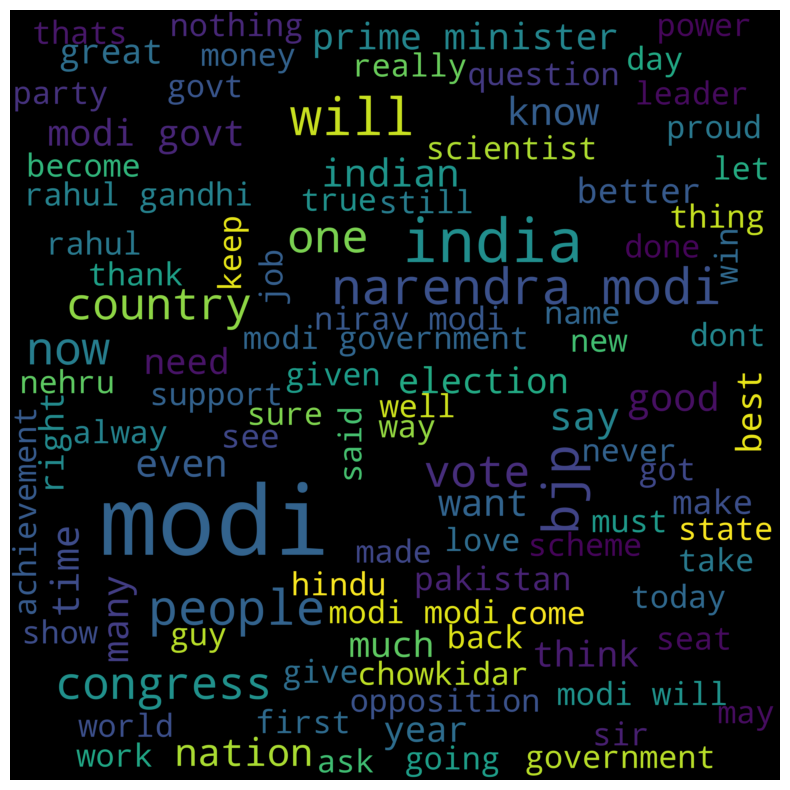

In [18]:
#positive
word_cloud_text = ''.join(train_data[train_data["Sentiment"]==1].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

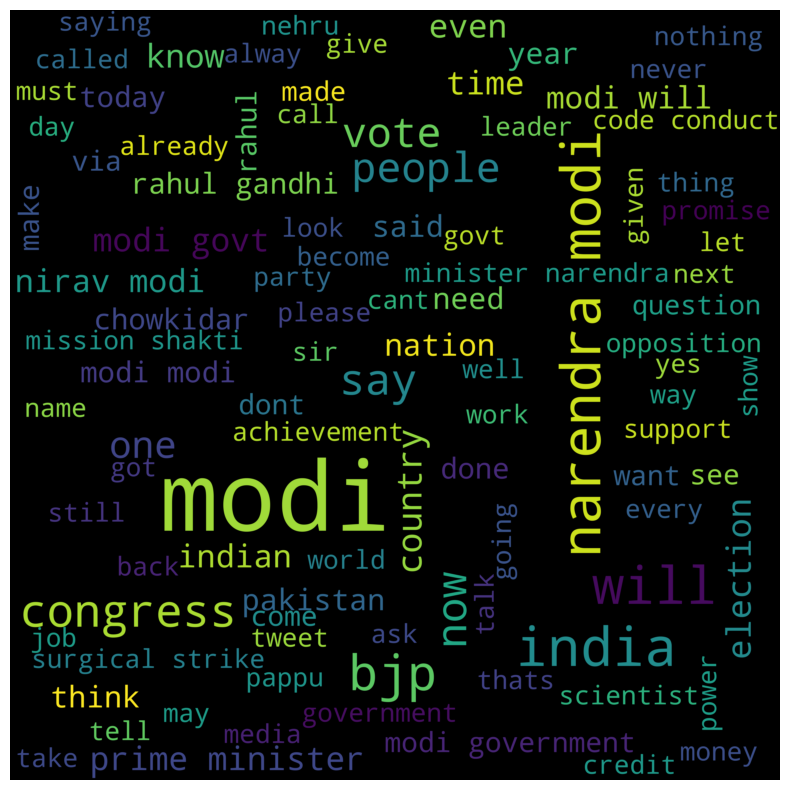

In [19]:
#neutral
word_cloud_text = ''.join(train_data[train_data["Sentiment"]==0].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

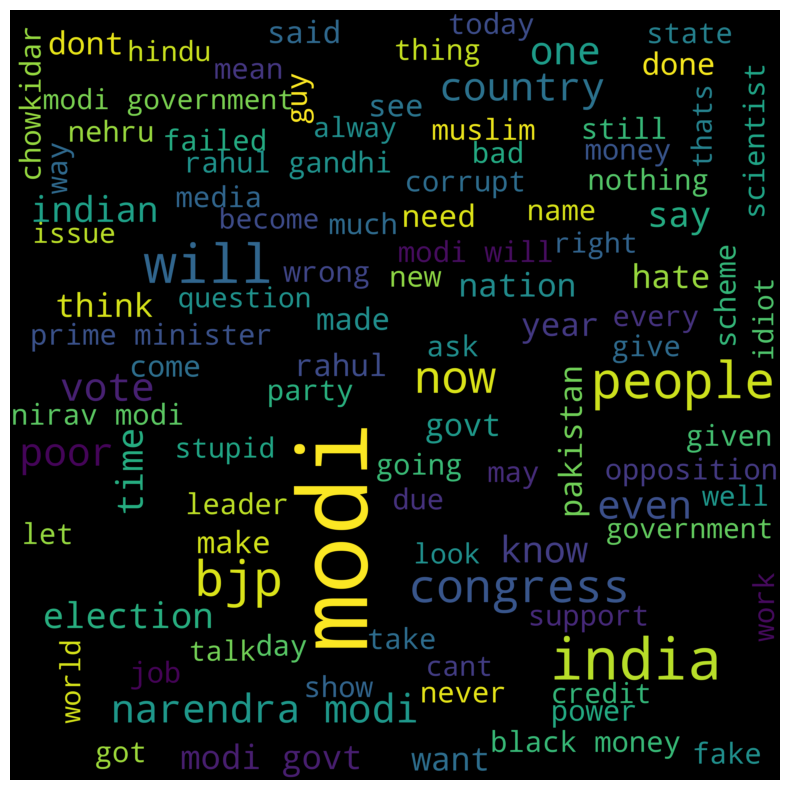

In [20]:
#negative
word_cloud_text = ''.join(train_data[train_data["Sentiment"]==-1].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Splitting text into tokens: Text is divided into tokens (words or parts of words).

In [21]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  106532


In [22]:
tokens_text[1]

['talk',
 'all',
 'the',
 'nonsense',
 'and',
 'continue',
 'all',
 'the',
 'drama',
 'will',
 'vote',
 'for',
 'modi']

Selecting stop words: Words that do not carry significant information, such as "the", "is".

In [23]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Bag of Words (BoW): The text is represented as a bag of words, a compilation of all the unique words in the text along with their count.

In [24]:
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, 
    ngram_range=(1, 1) 
)

Splitting the data into training and test sets: the data is split into training and test sets to evaluate the effectiveness of the model.

In [25]:
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=43)

In [26]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [27]:
X_test_bow

<32594x92497 sparse matrix of type '<class 'numpy.int64'>'
	with 425188 stored elements in Compressed Sparse Row format>

In [28]:
#Labels for train and test encoding
y_train_bow = reviews_train['Sentiment']
y_test_bow = reviews_test['Sentiment']

In [29]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

Sentiment
 1.0    0.442812
 0.0    0.338989
-1.0    0.218200
Name: count, dtype: float64

Learning the model: Using a logistic regression algorithm, the model is learned on training data.

In [30]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=150)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  90.96766276001718


In [31]:
#print('Predicted labels: ', test_pred[:232])

In [32]:
print("Classification Report for Test Data:")
print(classification_report(y_test_bow, test_pred))

Classification Report for Test Data:
              precision    recall  f1-score   support

        -1.0       0.89      0.83      0.85      7112
         0.0       0.90      0.97      0.93     11049
         1.0       0.93      0.91      0.92     14433

    accuracy                           0.91     32594
   macro avg       0.90      0.90      0.90     32594
weighted avg       0.91      0.91      0.91     32594



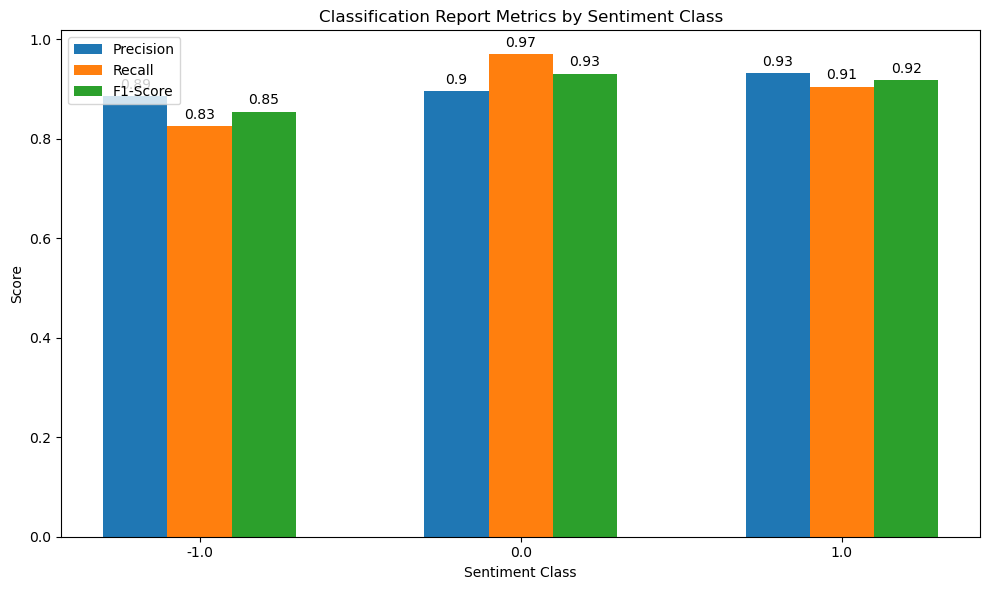

In [33]:

import numpy as np

# Generate Classification Report
report = classification_report(y_test_bow, test_pred, output_dict=True)

# Extract metrics for each class
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [report[class_]['precision'] for class_ in classes]
recall = [report[class_]['recall'] for class_ in classes]
f1_score = [report[class_]['f1-score'] for class_ in classes]

# Plotting
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
precision_bar = ax.bar(x - width, precision, width, label='Precision')
recall_bar = ax.bar(x, recall, width, label='Recall')
f1_score_bar = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add labels, title, and legend
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report Metrics by Sentiment Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Add value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(precision_bar)
add_value_labels(recall_bar)
add_value_labels(f1_score_bar)

plt.tight_layout()
plt.show()


In [34]:
#Validation data
X_val_bow = bow_counts.transform(test_data.lower)
y_val_bow = test_data['Sentiment']

In [35]:
X_val_bow

<37149x92497 sparse matrix of type '<class 'numpy.int64'>'
	with 575945 stored elements in Compressed Sparse Row format>

Model evaluation: The effectiveness of the model is evaluated on test data using an accuracy (precision) metric.

In [36]:
val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, val_res) * 100)

Accuracy:  89.49904438881262


Sentiment prediction: The predict_sentiment() function takes a sentence as input, processes it and predicts its sentiment using a learned model.

In [61]:
def predict_sentiment(model, bow_counts, sentence):
    # Preprocess input sentence
    processed_sentence = re.sub('[^A-Za-z0-9 ]+', ' ', sentence.lower())
    #print(processed_sentence)
    # Transform sentence using the same CountVectorizer
    transformed_sentence = bow_counts.transform([processed_sentence])
    #print(transformed_sentence)
    # Predict sentiment
    prediction = model1.predict(transformed_sentence)
    if prediction == 1:
        return "Positive"
    elif prediction == 0:
        return "Neutral"
    else:
        return "Negative"

In [111]:
test_sentence = input("Sentecne: ")
print(f"Sentiment for '{test_sentence}':", predict_sentiment(model1, bow_counts, test_sentence))

Sentecne:  Received some disappointing news about a project I've been working on for months. Back to the drawing board. 📉😞 #disappointment #setback


Sentiment for 'Received some disappointing news about a project I've been working on for months. Back to the drawing board. 📉😞 #disappointment #setback': Negative
